# Mall Customer Segmentation

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## Importing the dataset

In [31]:
dataset = pd.read_csv('Mall_Customers.csv')

# Select only the Annual Income and Spending Score columns for clustering
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Plot the WCSS values to visualize the elbow

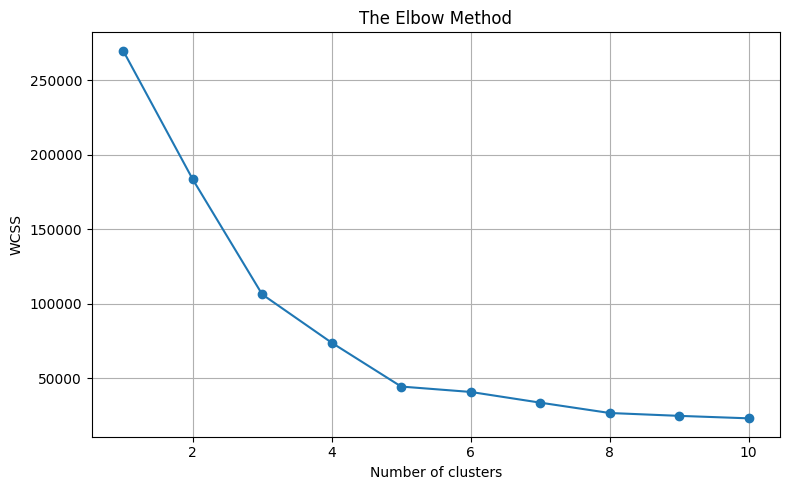

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.tight_layout()
plt.show()

## Training the K-Means model on the dataset

In [34]:
# Apply K-Means with the optimal number of clusters (chosen as 5 from the elbow graph)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

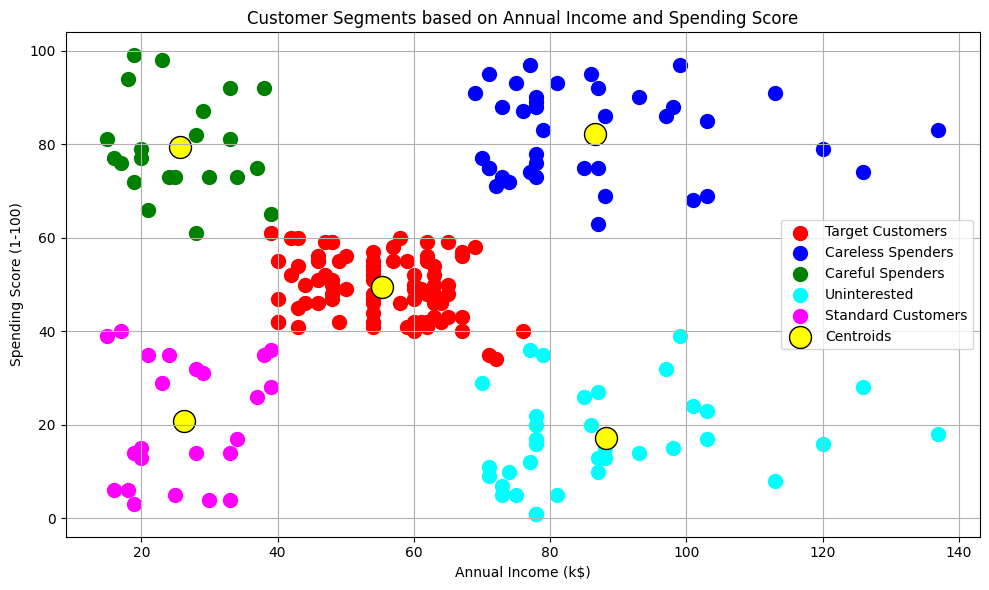

In [36]:
# Visualize the clusters with appropriate labels and colors
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Target Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Careless Spenders')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Careful Spenders')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Uninterested')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Standard Customers')

# Plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='yellow', label='Centroids', edgecolor='black')

# Add plot details
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('customer_segments.png')  # Save the cluster visualization plot
plt.show()